In [ ]:
pip install pyreadr

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
import pyreadr

result = pyreadr.read_r('movies (1).rdata')

data = result['movies']

In [3]:
import pandas as pd
data.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [4]:
print(data.columns)

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio',
       'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year',
       'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes',
       'critics_rating', 'critics_score', 'audience_rating', 'audience_score',
       'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win',
       'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3',
       'actor4', 'actor5', 'imdb_url', 'rt_url'],
      dtype='object')


In [5]:
data.isnull().sum()

title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               8
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         8
dvd_rel_month        8
dvd_rel_day          8
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              13
actor5              15
imdb_url             0
rt_url               0
dtype: int64

In [6]:
data=data.dropna(axis=0)


In [7]:
data.isnull().sum()

title               0
title_type          0
genre               0
runtime             0
mpaa_rating         0
studio              0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
dvd_rel_year        0
dvd_rel_month       0
dvd_rel_day         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
director            0
actor1              0
actor2              0
actor3              0
actor4              0
actor5              0
imdb_url            0
rt_url              0
dtype: int64

In [8]:
list_col=['best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win',
          'best_dir_win', 'top200_box']

In [9]:
def convert_to_binary(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0

In [10]:
data[list_col]=data[list_col].applymap(convert_to_binary)

In [11]:
data

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,0,0,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,0,0,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,0,0,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,1,0,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,0,0,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008.0,7.0,11.0,2008.0,...,0,0,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998.0,1.0,16.0,1998.0,...,0,0,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008.0,3.0,9.0,2008.0,...,0,0,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004.0,6.0,16.0,2004.0,...,0,1,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


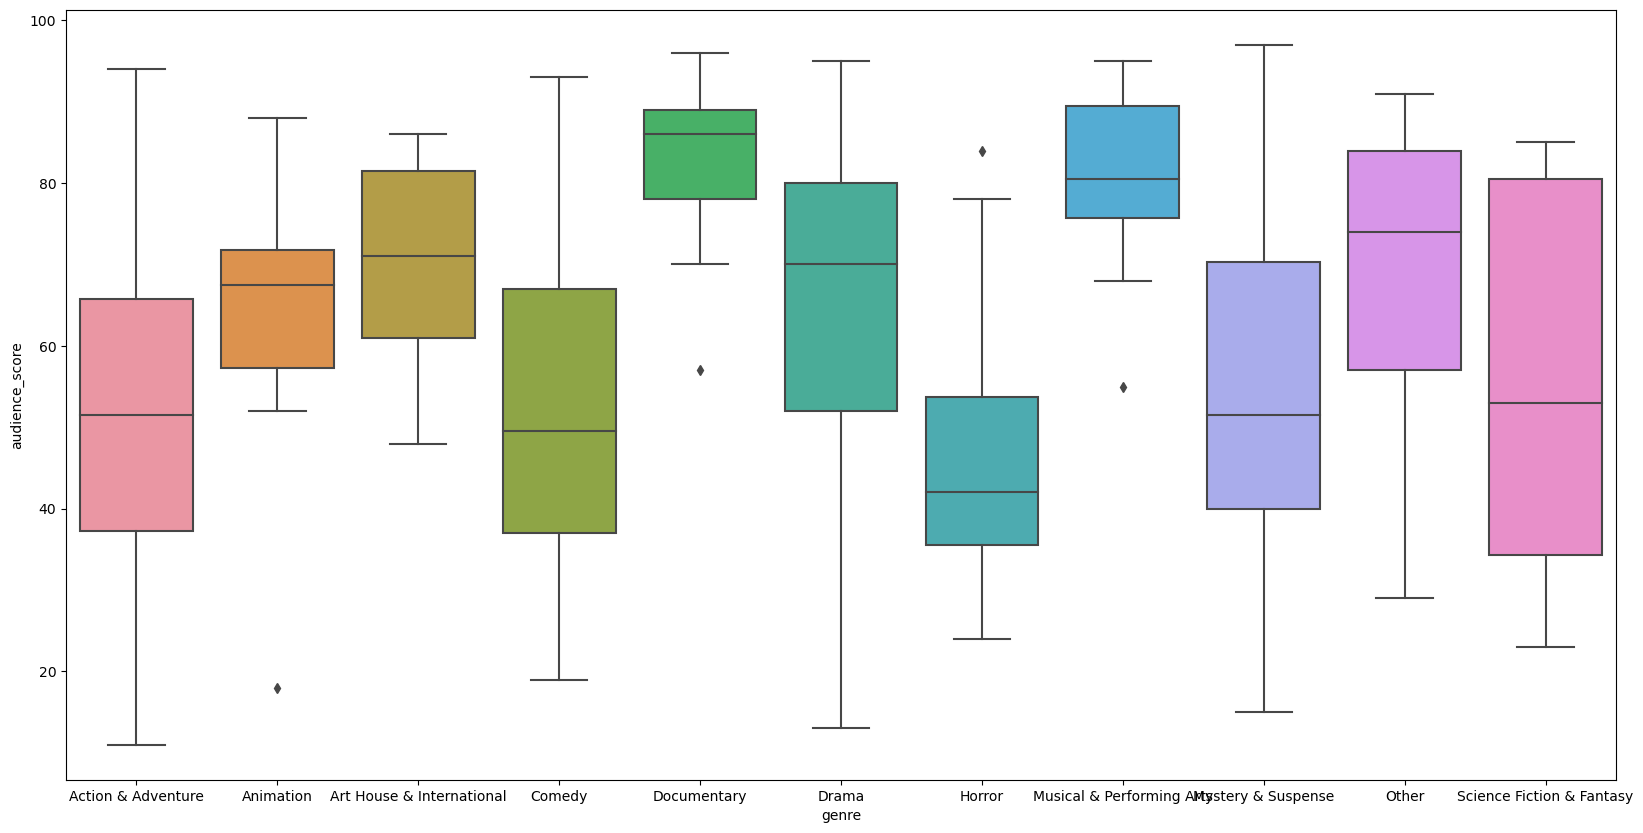

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data['genre'],data['audience_score'])
plt.show()

It seems like different genre of movies do have different distributions of audience score.

In [13]:
dummies=pd.get_dummies(data.genre,prefix='genre')
data.drop('genre',axis=1,inplace=True)
data=pd.concat([data,dummies],axis=1)

In [14]:
data

,title,title_type,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy
0,Filly Brown,Feature Film,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,7.0,...,0,0,0,0,1,0,0,0,0,0
1,The Dish,Feature Film,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,8.0,...,0,0,0,0,1,0,0,0,0,0
2,Waiting for Guffman,Feature Film,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,8.0,...,0,0,1,0,0,0,0,0,0,0
3,The Age of Innocence,Feature Film,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,11.0,...,0,0,0,0,1,0,0,0,0,0
4,Malevolence,Feature Film,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,4.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,97.0,PG,Genius Productions,2008.0,7.0,11.0,2008.0,10.0,...,0,0,0,0,1,0,0,0,0,0
647,Half Baked,Feature Film,82.0,R,Universal Pictures,1998.0,1.0,16.0,1998.0,6.0,...,0,0,1,0,0,0,0,0,0,0
648,Dance of the Dead,Feature Film,87.0,R,Grindhouse Entertainment,2008.0,3.0,9.0,2008.0,10.0,...,0,0,0,0,0,0,0,0,0,0
649,Around the World in 80 Days,Feature Film,120.0,PG,Buena Vista Pictures,2004.0,6.0,16.0,2004.0,11.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

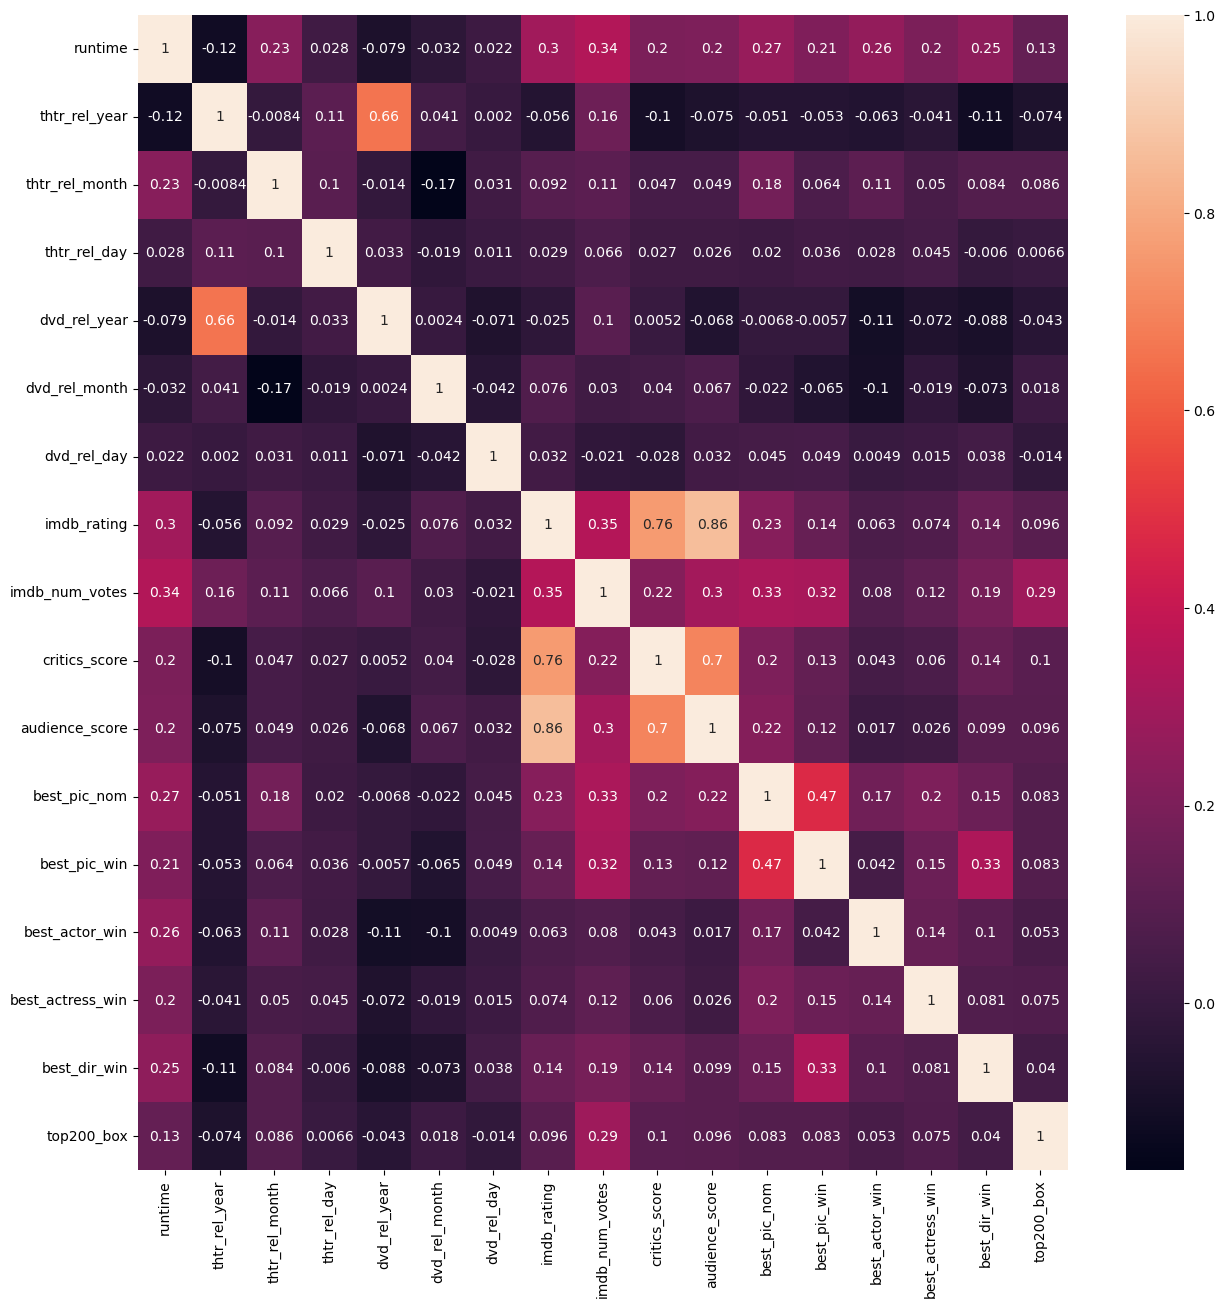

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data.loc[:, ~data.columns.isin(['genre_Action & Adventure','genre_Animation','genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama','genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other','genre_Science Fiction & Fantasy'])].corr(),annot=True)

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [18]:
x=data.drop('audience_score',axis=1)

In [19]:
y=data['audience_score']


In [21]:
x=sm.add_constant(x)

In [22]:
x

,const,title,title_type,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy
0,1.0,Filly Brown,Feature Film,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,The Dish,Feature Film,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,Waiting for Guffman,Feature Film,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,The Age of Innocence,Feature Film,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,Malevolence,Feature Film,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,1.0,Death Defying Acts,Feature Film,97.0,PG,Genius Productions,2008.0,7.0,11.0,2008.0,...,0,0,0,0,1,0,0,0,0,0
647,1.0,Half Baked,Feature Film,82.0,R,Universal Pictures,1998.0,1.0,16.0,1998.0,...,0,0,1,0,0,0,0,0,0,0
648,1.0,Dance of the Dead,Feature Film,87.0,R,Grindhouse Entertainment,2008.0,3.0,9.0,2008.0,...,0,0,0,0,0,0,0,0,0,0
649,1.0,Around the World in 80 Days,Feature Film,120.0,PG,Buena Vista Pictures,2004.0,6.0,16.0,2004.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=5)

In [24]:
data.columns

Index(['title', 'title_type', 'runtime', 'mpaa_rating', 'studio',
       'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year',
       'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes',
       'critics_rating', 'critics_score', 'audience_rating', 'audience_score',
       'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win',
       'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3',
       'actor4', 'actor5', 'imdb_url', 'rt_url', 'genre_Action & Adventure',
       'genre_Animation', 'genre_Art House & International', 'genre_Comedy',
       'genre_Documentary', 'genre_Drama', 'genre_Horror',
       'genre_Musical & Performing Arts', 'genre_Mystery & Suspense',
       'genre_Other', 'genre_Science Fiction & Fantasy'],
      dtype='object')

In [25]:
['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']

['critics_score',
 'best_pic_nom',
 'const',
 'genre_Action & Adventure',
 'genre_Animation',
 'genre_Art House & International',
 'genre_Comedy',
 'genre_Documentary',
 'genre_Drama',
 'genre_Horror',
 'genre_Musical & Performing Arts',
 'genre_Mystery & Suspense',
 'genre_Other',
 'genre_Science Fiction & Fantasy']

In [44]:
model=sm.OLS(y_train,x_train[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']])

In [45]:
res=model.fit()

In [46]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         audience_score   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     43.81
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.85e-66
Time:                        20:03:30   Log-Likelihood:                -1757.0
No. Observations:                 433   AIC:                             3540.
Df Residuals:                     420   BIC:                             3593.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
critics_score                       0.4767      0.027     17.570      0.000       0.423       0.530
best_pic_nom                        7.2928      3.855      1.892      0.059      -0.285      14.870
const                              32.4298      1.797     18.048      0.000      28.898      35.962
genre_Action & Adventure            1.4559      2.147      0.678      0.498      -2.765       5.677
genre_Animation                     5.4945      5.423      1.013      0.312      -5.165      16.154
genre_Art House & International    10.6876      5.427      1.970      0.050       0.021      21.354
genre_Comedy                       -2.1243      2.027     -1.048      0.295      -6.108       1.859
genre_Documentary                   8.9253      2.745      3.252      0.001       3.530      14.321
genre_Drama                         3.6260      1.464      2.476      0.014       0.748       6.504
genre_Horror                       -4.4549      3.539     -1.259      0.209     -11.412       2.502
genre_Musical & Performing Arts     9.9227      4.781      2.076      0.039       0.525      19.320
genre_Mystery & Suspense           -2.4350      2.462     -0.989      0.323      -7.274       2.404
genre_Other                         2.0810      4.268      0.488      0.626      -6.308      10.470
genre_Science Fiction & Fantasy    -0.7491      5.413     -0.138      0.890     -11.389       9.891
==============================================================================
Omnibus:                        0.923   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.989
Skew:                          -0.044   Prob(JB):                        0.610
Kurtosis:                       2.783   Cond. No.                     8.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
res.predict(x_train[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']])

587    45.083144
17     65.134410
233    42.729598
631    32.854922
161    83.725637
         ...    
9      75.621769
75     61.797523
422    86.164741
122    52.740259
216    48.663346
Length: 433, dtype: float64

In [50]:
res.predict(x_test[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']])

578    72.761580
271    70.824843
308    78.481958
542    89.024929
579    71.944168
         ...    
248    33.642389
479    64.657712
604    51.333069
355    82.871840
121    67.994599
Length: 186, dtype: float64

In [51]:
import numpy as np

In [52]:
def metrics(act,pred):
    print("RMSE_: ",np.sqrt(((act-pred)**2).mean()))
    print("MAE_: ",(np.abs(act-pred)).mean())

In [53]:
metrics(y_train,res.predict(x_train[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']]))

RMSE_:  13.99530231236104
MAE_:  11.230087058264298


In [54]:
metrics(y_test,res.predict(x_test[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']]))

RMSE_:  13.54051260228649
MAE_:  10.670810753427403


<AxesSubplot:ylabel='audience_score'>

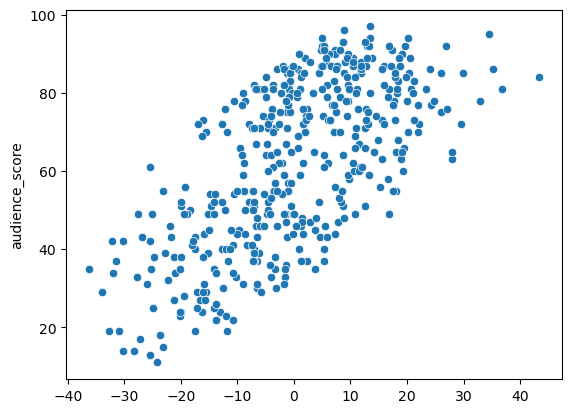

In [55]:
sns.scatterplot(res.resid,y)

<AxesSubplot:ylabel='Density'>

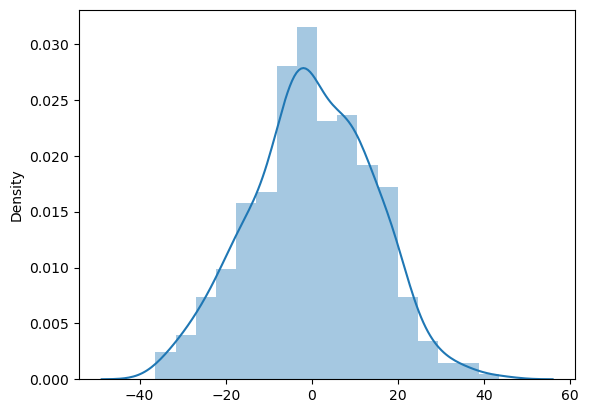

In [56]:
sns.distplot(res.resid)

In [57]:
from scipy import stats
x=stats.shapiro(res.resid)

In [58]:
x

ShapiroResult(statistic=0.996540904045105, pvalue=0.47889652848243713)

In [67]:
bp_test = het_breuschpagan(res.resid, x_train[['critics_score','best_pic_nom','const','genre_Action & Adventure','genre_Animation',
                           'genre_Art House & International','genre_Comedy','genre_Documentary','genre_Drama',
                           'genre_Horror','genre_Musical & Performing Arts','genre_Mystery & Suspense','genre_Other',
                           'genre_Science Fiction & Fantasy']])


In [68]:
print('Breusch-Pagan test statistic: {:.4f}'.format(bp_test[0]))
print('p-value: {:.4f}'.format(bp_test[1]))
print('Lagrange multiplier statistic: {:.4f}'.format(bp_test[2]))
print('p-value for Lagrange multiplier test: {:.4f}'.format(bp_test[3]))

Breusch-Pagan test statistic: 32.4358
p-value: 0.0021
Lagrange multiplier statistic: 2.8341
p-value for Lagrange multiplier test: 0.0009
